## Импротируем библиотеки и сделаем доп. настройки: 

In [6]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import numpy as np

#визуализация
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')  

## Выполним предварительную обработку данных:

In [9]:
#чтение датасета с помощью библиотеки pandas
df = pd.read_csv('5gym_churn.csv')
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Описание данных:
- gender - пол;
- near_location - близкое расположение;
- partner - сотрудник компании партнера;
- promo_friends – по промо друзей;
- phone – указан ли телефон;
- contract_period - длительность текущего абонемента;
- group_visits - посещение групповых занятий;
- age - возраст;
- avg_additional_charges_total – средние траты на доп услуги;
- month_to_end_contract – количество месяцев до окончания абонемента;
- lifetime - время с первого обращения в фитнесс-центр (в месяцах);
- avg_class_frequency_total - средняя частота посещений в неделю за все время с начала действия абонемента;
- avg_class_frequency_current_month - средняя частота посещений в неделю за предыдущий месяц.


In [10]:
#приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
print('Кол-во дублей в строках: {}\n'.format(df.duplicated().sum()))
print(df.info())
df.head(5)

Кол-во дублей в строках: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total   

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Оценка данных:
Количество столбцов: 14, количество строк: 4000

Типы данных в столбцах: 10 столбцов - int64, 4 столбца - float64.

Возможные ошибки: 
- Пропущенных значений нет.
- Полных дубликатов нет.
- Все столбцы имеют корректный тип данных.


## Выполним кластеризацию объектов: 
### Иерархический агломеративный метод:

In [11]:
#группирем таблицу по признаку 'Churn' и подсчитываем среднее значение по всем столбцам
df.groupby('churn').mean().reset_index()

#имортируем необходимую модель для обучения
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#создаём класс модели LogisticRegression
log_model = LogisticRegression(random_state=0, solver = 'lbfgs')

#разделяем выборку на признаки [матрица Х] и целевую переменную [Y]
X = df.drop('churn', axis = 1)
y = df['churn']

#разделяем данные на обучающую 80% [train] и валидационную 20% [test] выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

#обучаем модель логистической регрессии
log_model.fit(X_train, y_train)

#используем обученную модель для получения прогноза на валидационной выборке
log_predictions = log_model.predict(X_test)

print('Модель:', 'Логистическая регрессия успешно обучена!')

Модель: Логистическая регрессия успешно обучена!


In [12]:
#импортируем необходимую модель для обучения
from sklearn.ensemble import RandomForestClassifier

#создаём класс модели RandomForestRegressor со следующими значениями
#кол-во деревьев = 150, параметр bootstrap = True, глубина дерева = 12, максимум признаков для дерева = 12
rf_model = RandomForestClassifier(n_estimators = 150, bootstrap = True, max_depth=12, max_features=12, random_state=0)

#обучаем модель алгоритмом Случайный Лес - Random Forest
rf_model.fit(X_train, y_train)

#используем обученную модель для получения прогноза на валидационной выборке
forest_predictions = rf_model.predict(X_test)
print('Модель:', 'Случайный лес успешно обучена!')

Модель: Случайный лес успешно обучена!


Для оценки качества полученных прогнозов и выбора наиболее лучшей модели необходимо сравнить следующие метрики модели:
- accuracy - доля правильных ответов;
- precision - точность модели;
- recall - полнота модели.

In [13]:
#импортируем необходимые классы метрик для сравнения качества двух моделей
from sklearn.metrics import accuracy_score, precision_score, recall_score

#расчёт метрик для модели  Logistic Regression
accuracy_log = accuracy_score(y_test, log_predictions)   # Расчёт метрики Accuracy
precision_log = precision_score(y_test, log_predictions) # Расчёт метрики Precision  
recall_log = recall_score(y_test, log_predictions)       # Расчёт метрики Recall

#расчёт метрик для модели  Random Forest Regressor
accuracy_forest = accuracy_score(y_test, forest_predictions)   # Расчёт метрики Accuracy
precision_forest = precision_score(y_test, forest_predictions) # Расчёт метрики Precision  
recall_forest = recall_score(y_test, forest_predictions)       # Расчёт метрики Recall

#вывод результатов расчитанных метрик на экран
print('Модель',  'Логистическая регрессия - Logistic Regression')
print('Метрика Accuracy:', '{:.2f}%'.format(accuracy_log))
print('Метрика Precision:', '{:.2f}%'.format(precision_log))
print('Метрика Recall:', '{:.2f}%'.format(recall_log))
print( '====================================================')
print('Модель',  'Случайный лес - Random Forest Classifier')
print('Метрика Accuracy:', '{:.2f}%'.format(accuracy_forest))
print('Метрика Precision:', '{:.2f}%'.format(precision_forest))
print('Метрика Recall:', '{:.2f}%'.format(recall_forest))

Модель Логистическая регрессия - Logistic Regression
Метрика Accuracy: 0.92%
Метрика Precision: 0.87%
Метрика Recall: 0.82%
Модель Случайный лес - Random Forest Classifier
Метрика Accuracy: 0.93%
Метрика Precision: 0.87%
Метрика Recall: 0.85%


Вывод: модель Random Forest Classifier имеет более высокое качество прогнозирования ухода клиентов. Основное отличие заключается в метрике Recall , данная метрика показывает, сколько реальных объектов класса __1__ удалось обнаружить с помощью данной модели.

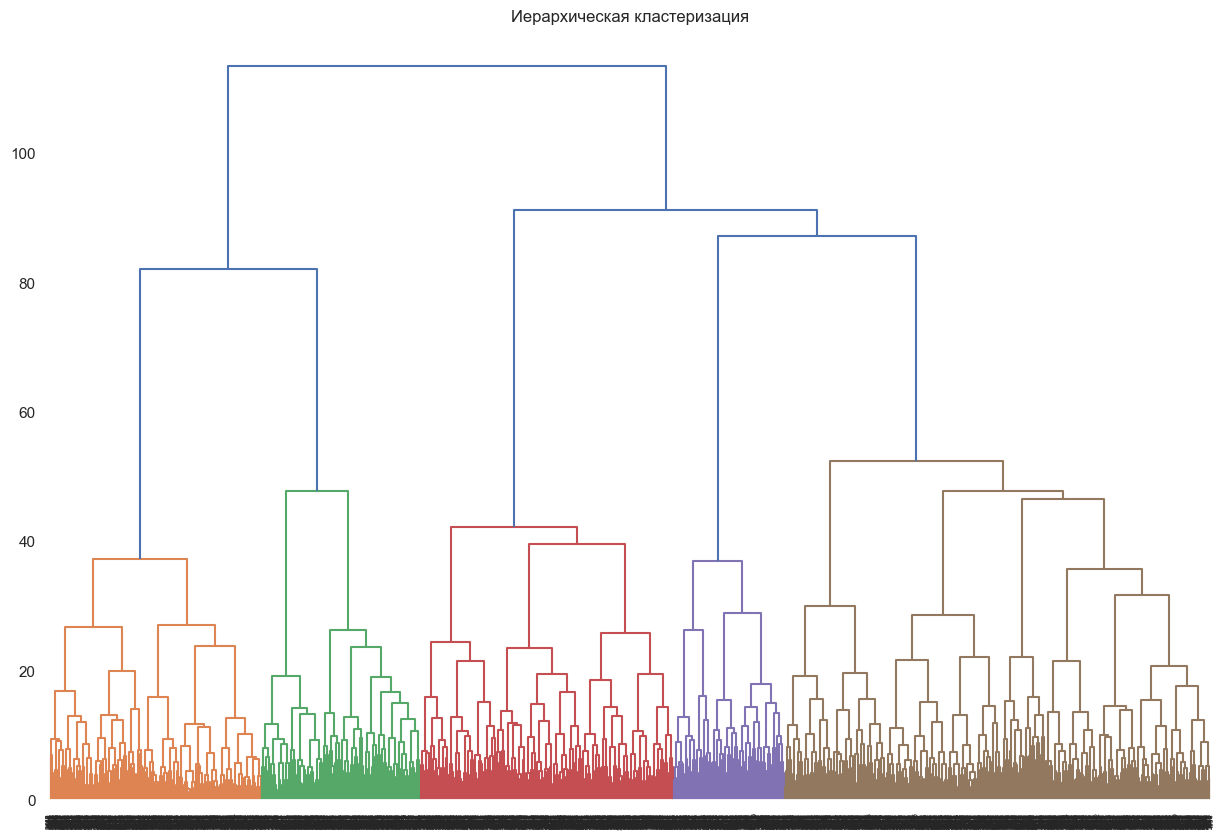

In [14]:
#импортируем  необходимые методы и классы
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler() # создадим объект класса Scaler (нормализатор)

#обучим нормализатор и преобразую набор данных
standart_df = scaler.fit_transform(df) 

#рассчитаем матрицу расстояний с помощью метода linkage
linked = linkage(standart_df, method = 'ward')


plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Из полученной дендрограммы видно, что оптимальное число кластеров для кластеризации клиентов фитнес центра - 5 кластеров.

### Построим матрицу корреляции для поиска явных признаков:

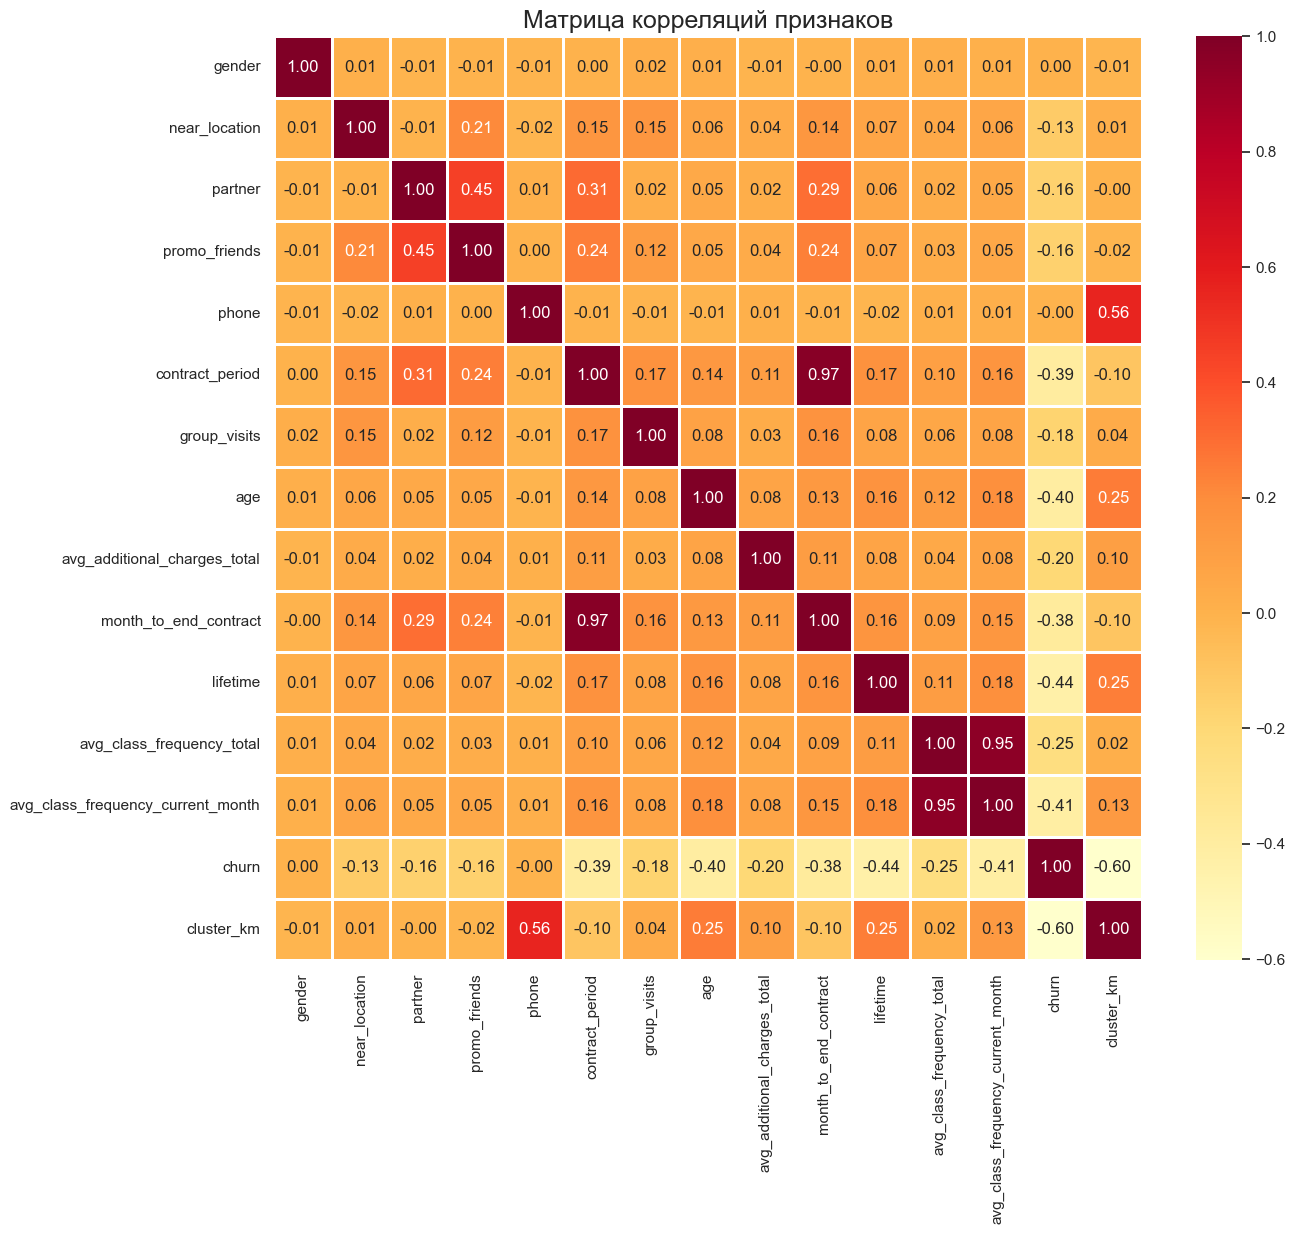

In [22]:
# постороим матрицу корреляции признаков в датасете
cm = df.corr()

# нарисуем график количества записей для каждого события
plt.figure(figsize=(14, 12)) # Размер графика
plt.title('Матрица корреляций признаков', fontsize=18) # Название графика
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlOrRd") # График "тепловая карта"
plt.show()

По матрице корреляции явных признаков не найдено, но можно выделить lifetime, сontract_period и month_to_end_contact.

## Метод k-средних: 

In [17]:
# импорируем класс алгоритма KMeans
from sklearn.cluster import KMeans

scaler = StandardScaler() # Создаю объект класса Scaler (нормализатор)

# обучим нормализатор и преобразую набор данных
standart_df = scaler.fit_transform(df)

# инициализируем модель K_Means с числом кластеров равным 5
km = KMeans(n_clusters = 5, random_state=1)

# применим модель K_Means к стандартизированным данным и кластеризирую их
cluster_df = km.fit_predict(standart_df)


# присвоим каждому наблюдению в датафрейме соответствующее значение кластера 
df['cluster_km'] = cluster_df

# подсчитаем среднее значение каждого признака для каждого кластера
display(df.groupby('cluster_km').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,0.503125,0.938542,0.767708,0.562500,1.000000,11.200000,0.559375,29.880208,162.783361,10.251042,4.718750,2.028887,2.023255,0.015625
3,0.552817,0.842723,0.369718,0.212441,0.998826,2.674883,0.440141,29.969484,160.701876,2.468310,4.613850,2.916013,2.923022,0.007042
4,0.472832,0.826590,0.455491,0.261272,1.000000,2.751445,0.382659,30.046243,151.641903,2.546821,4.634682,1.169503,1.168325,0.001156


Для каждого признака создадим графики, которые покажут среднее значение каждого признака для каждого кластера клиентов. Таким образом можно наглядно сравнить средние значения показателей по каждому кластеру и выявить особенности каждого кластера.

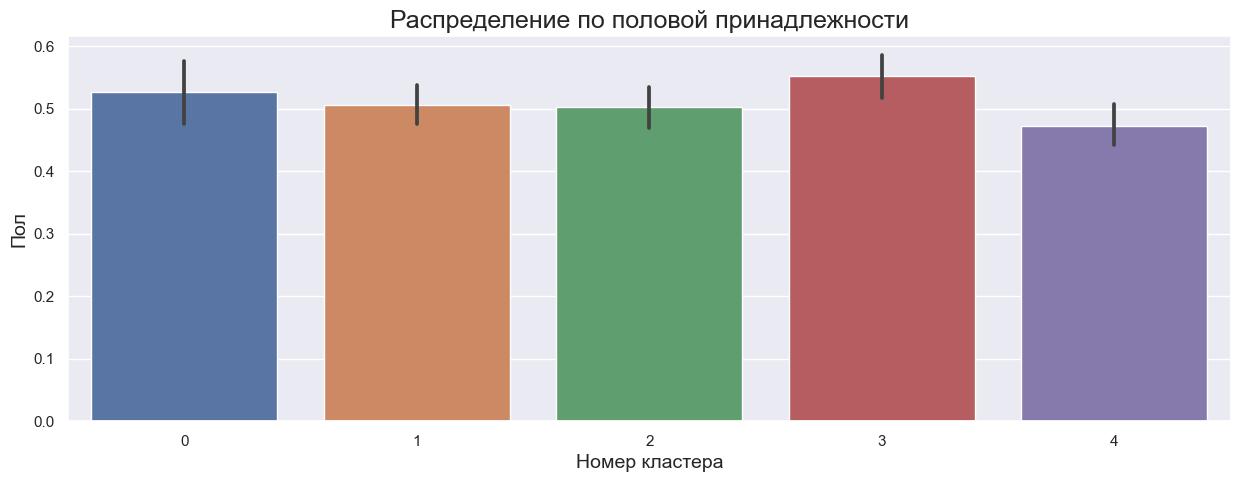

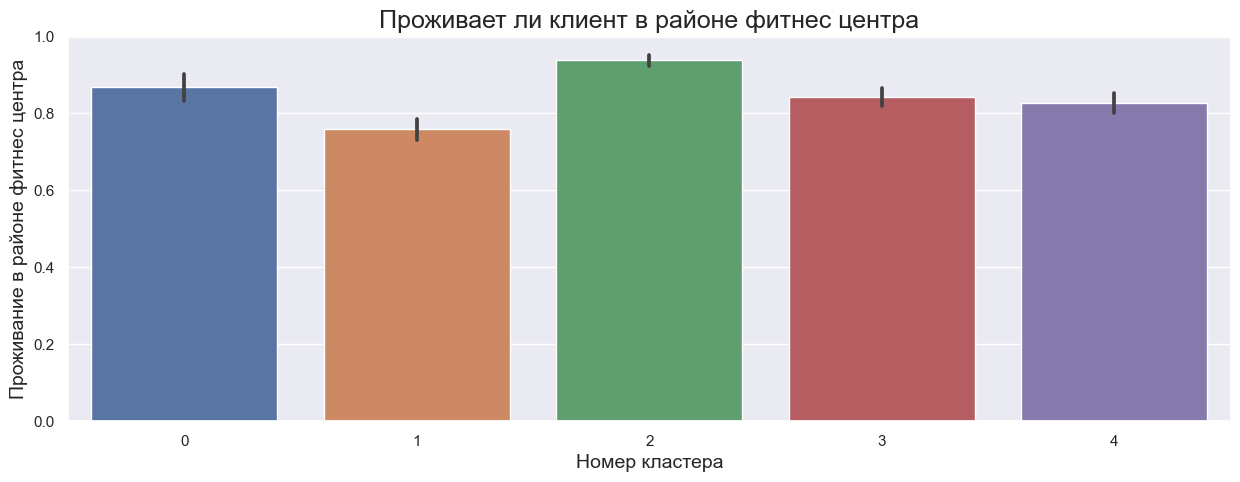

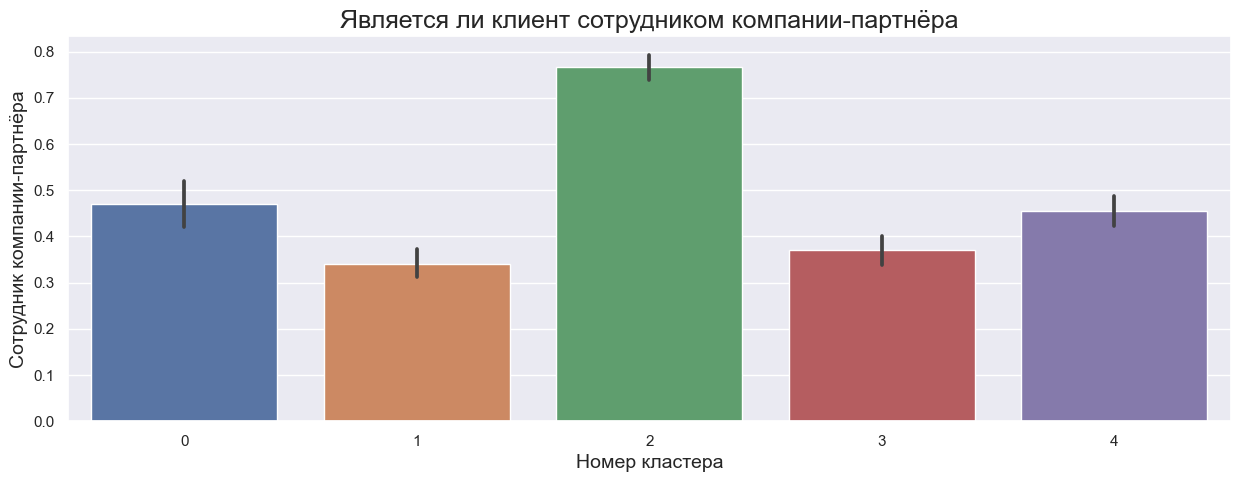

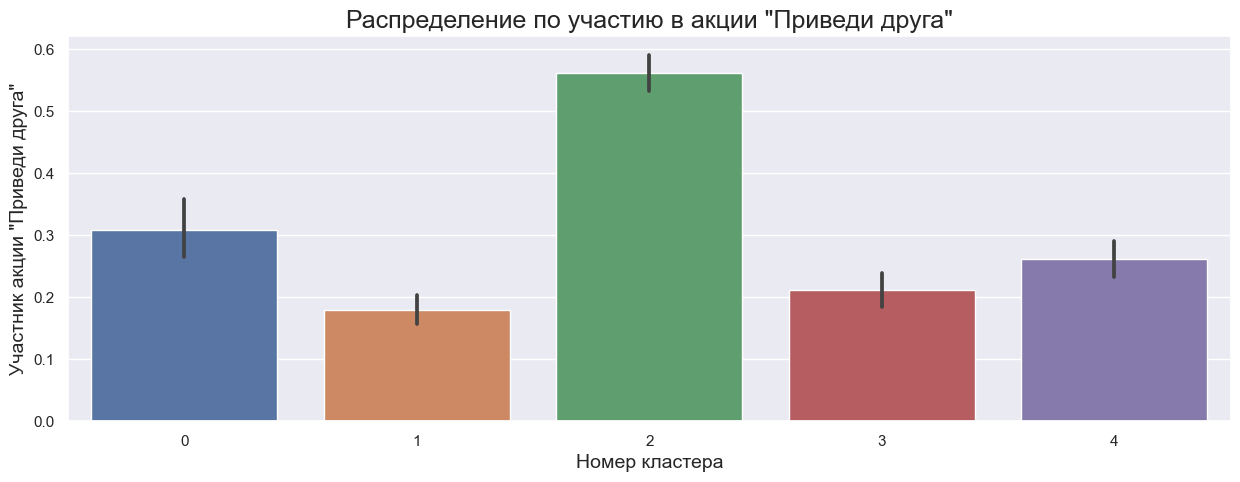

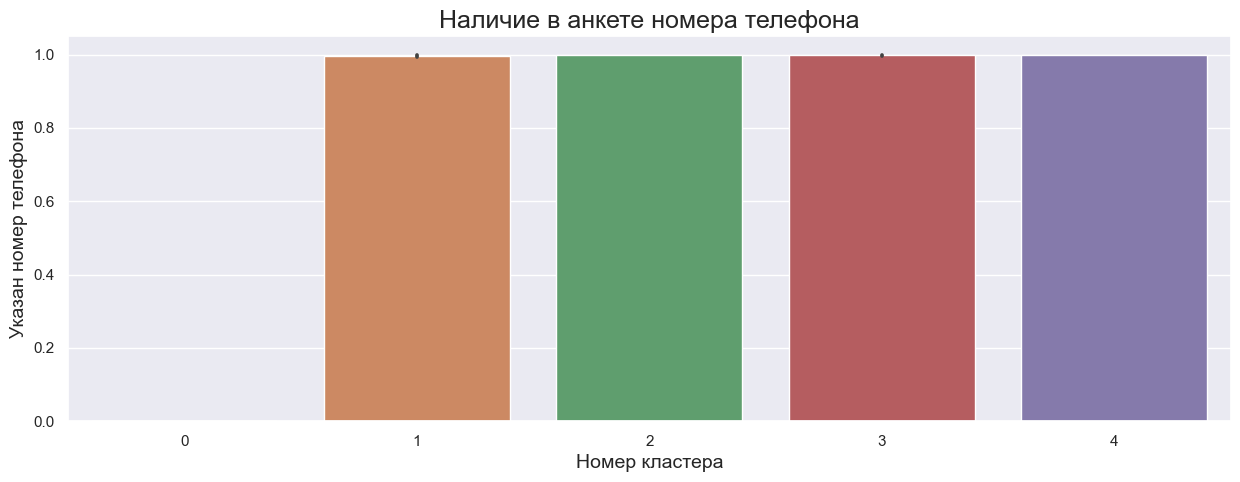

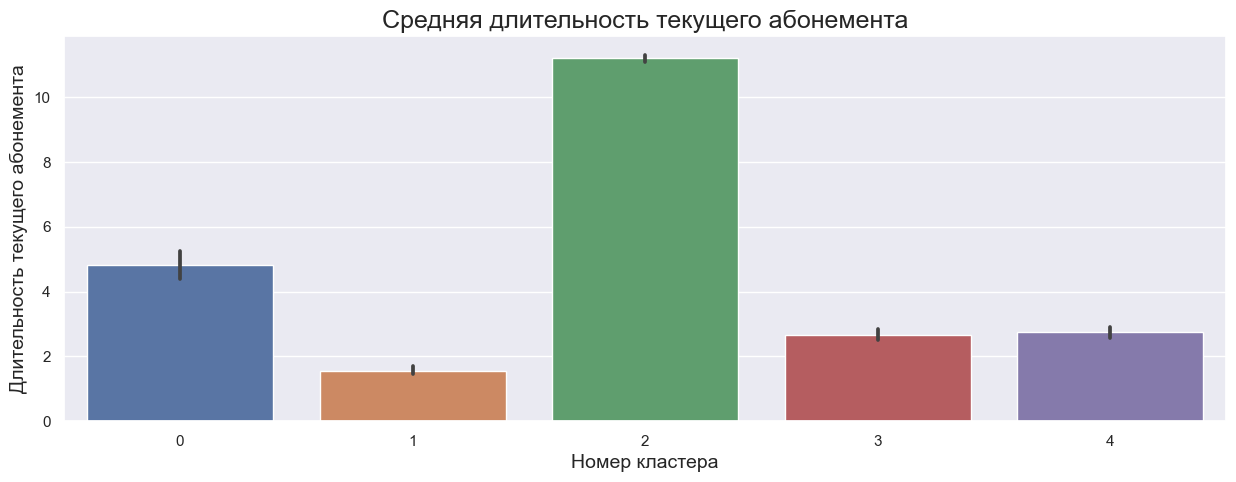

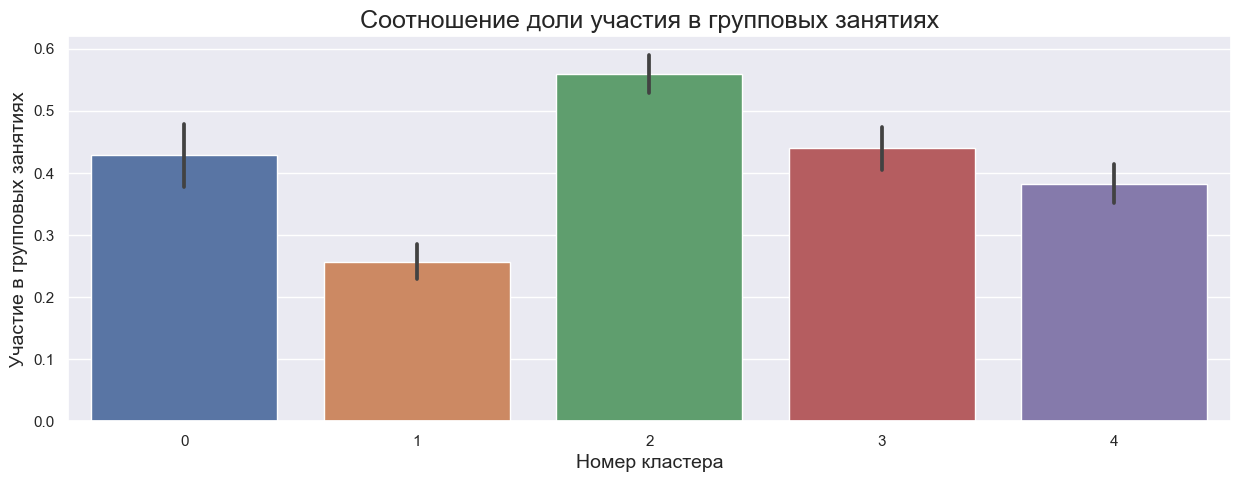

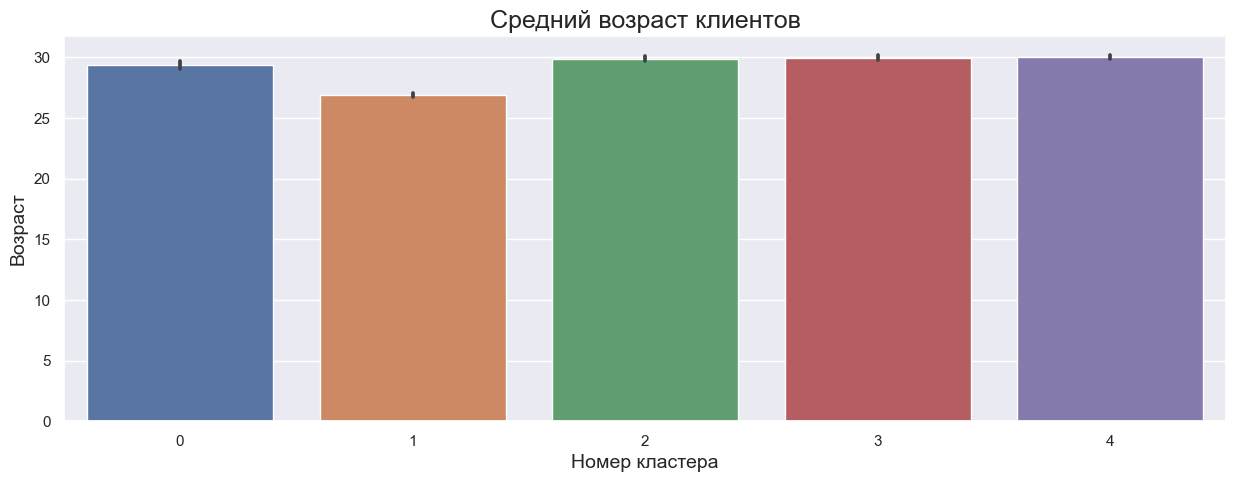

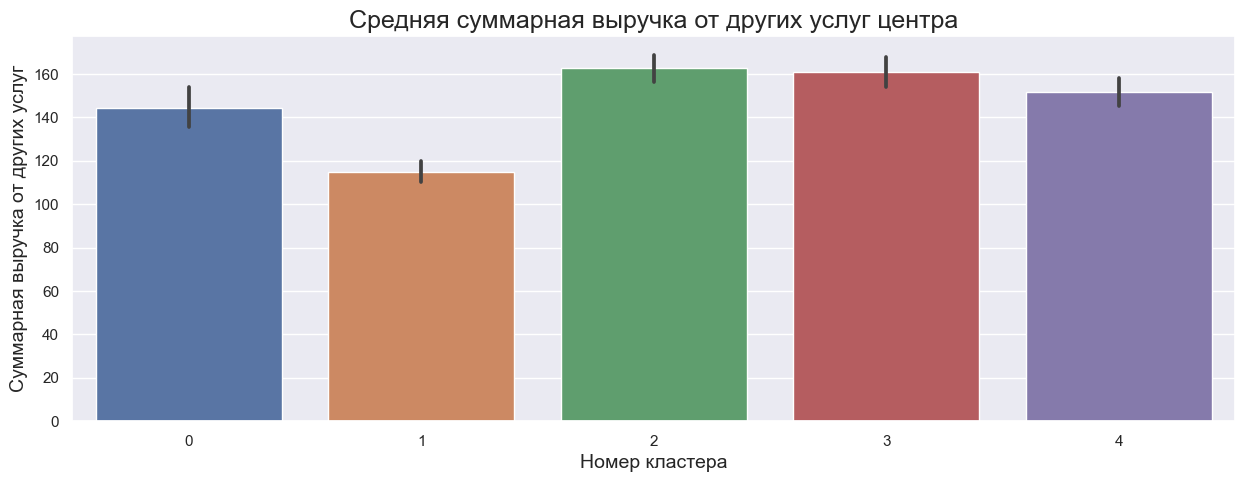

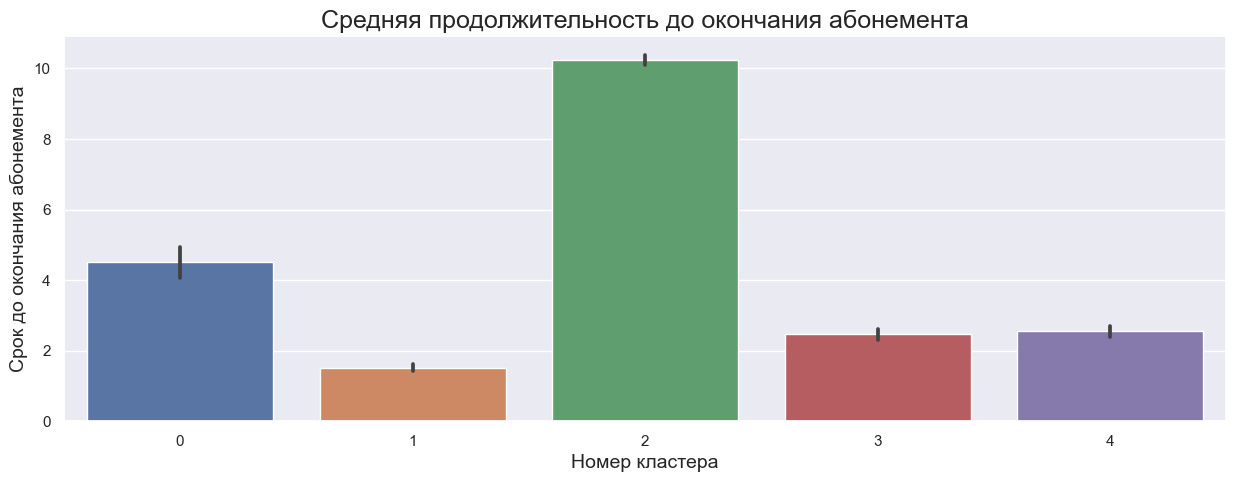

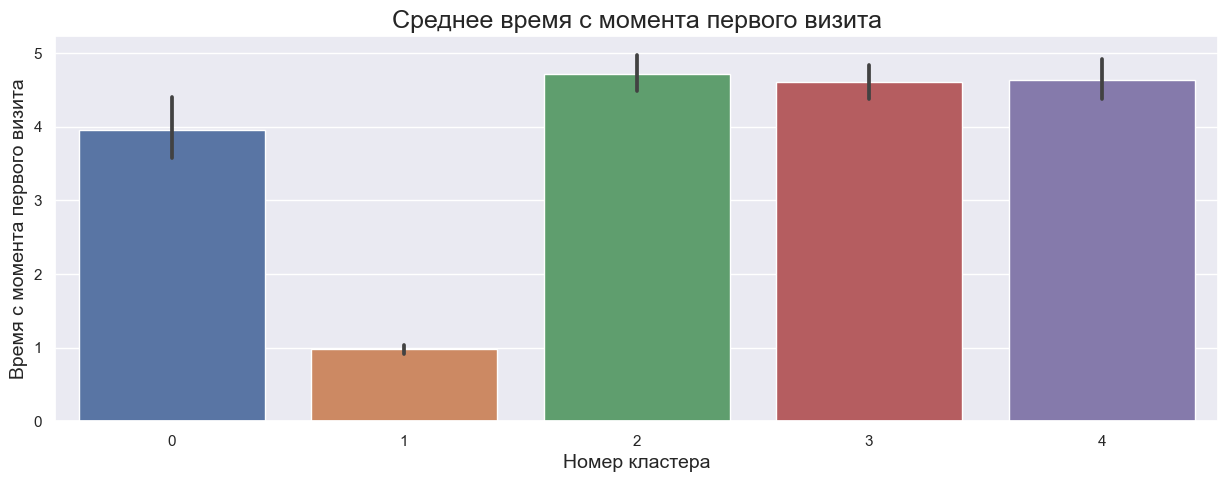

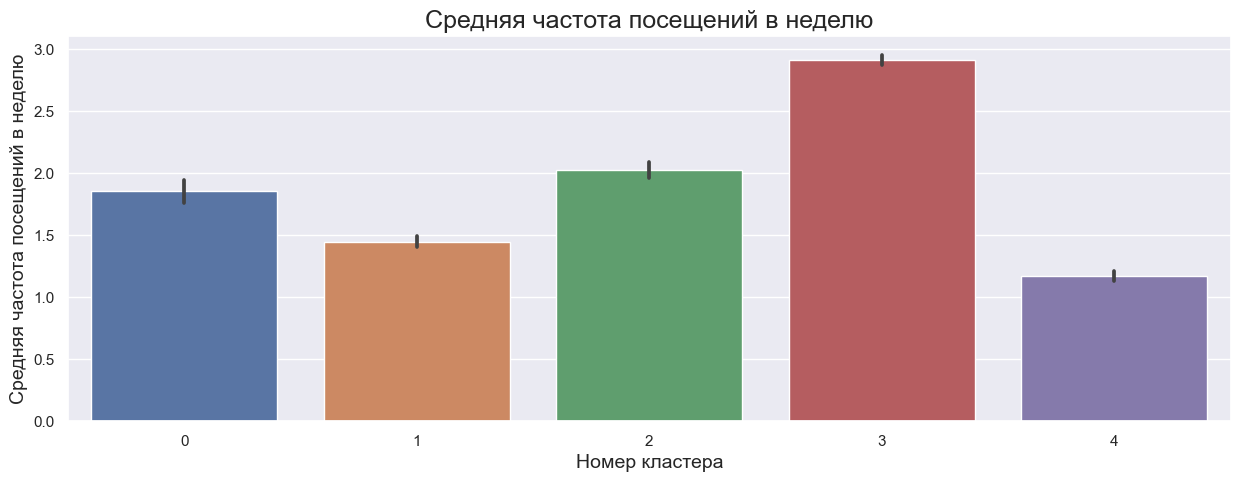

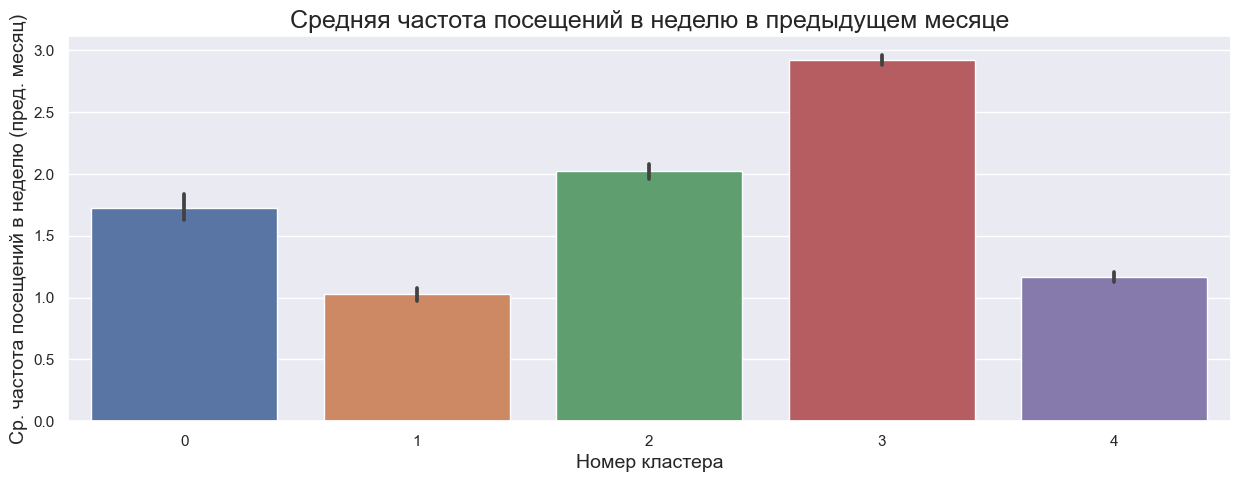

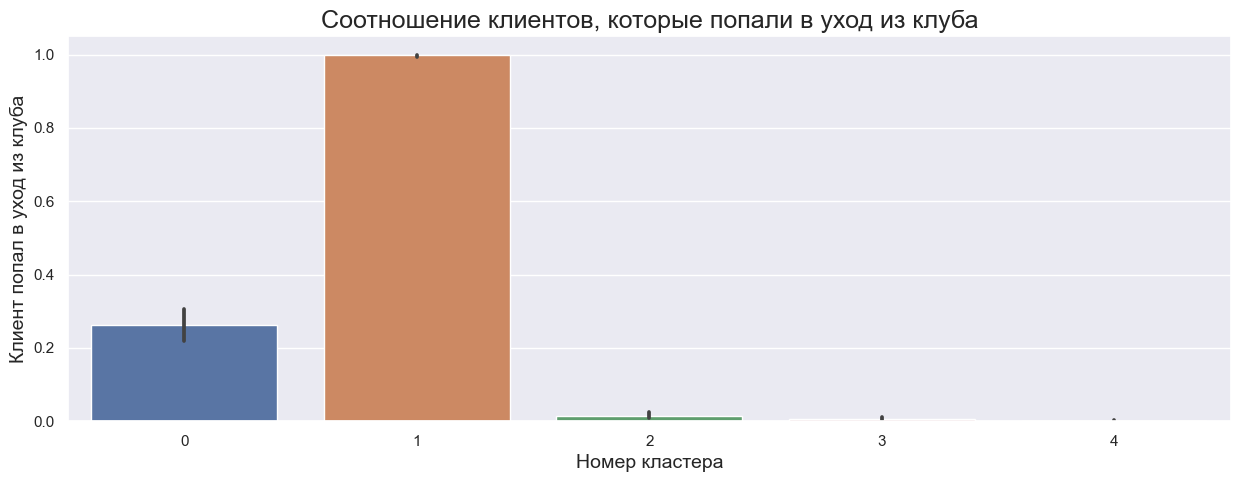

In [18]:
# Список с названиями признаков
column_list = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']
# Список с названиями графиков
title_list = ['Распределение по половой принадлежности', 'Проживает ли клиент в районе фитнес центра', 'Является ли клиент сотрудником компании-партнёра', 'Распределение по участию в акции "Приведи друга"', 'Наличие в анкете номера телефона', 'Средняя длительность текущего абонемента', 'Соотношение доли участия в групповых занятиях', 'Средний возраст клиентов', 'Средняя суммарная выручка от других услуг центра', 'Средняя продолжительность до окончания абонемента', 'Среднее время с момента первого визита', 'Средняя частота посещений в неделю', 'Средняя частота посещений в неделю в предыдущем месяце', 'Соотношение клиентов, которые попали в уход из клуба'] 
# Список с назнаниями подписей оси Х
ylabel_list = ['Пол', 'Проживание в районе фитнес центра', 'Сотрудник компании-партнёра', 'Участник акции "Приведи друга"', 'Указан номер телефона', 'Длительность текущего абонемента', 'Участие в групповых занятиях', 'Возраст', 'Суммарная выручка от других услуг', 'Срок до окончания абонемента', 'Время с момента первого визита', 'Средняя частота посещений в неделю', 'Ср. частота посещений в неделю (пред. месяц)', 'Клиент попал в уход из клуба']
# Цикл для создания графиков 'barplot'
count = 0 # Счётчик для отображения названия графика
for i in column_list:
    plt.figure(figsize = (15, 5))             # Размер графика
    plt.title(title_list[count], fontsize=18) # Название графика
    plt.xlabel('', fontsize=14) # Размер шрифта на оси X
    plt.ylabel('', fontsize=14) # Размер шрифта на оси Y
    sns.barplot(x='cluster_km', y=i, data=df).set(ylabel=ylabel_list[count], xlabel='Номер кластера') # График barplot
    plt.show()        # Отобразить график на экране
    count = count + 1 # Счётчик для отображения названия графика

In [19]:
# соотношение клиентов ушедших из клуба и тех кто остался для каждого кластера
df.groupby(['churn', 'cluster_km']).agg({'churn':'count'})

churn
churn cluster_km       
0     0             282
      1               2
      2             945
      3             846
      4             864
1     0             100
      1             939
      2              15
      3               6
      4               1

In [23]:
# Расчёт вероятности того, что клиент попадёт в уход из клуба для каждого кластера
churn_df = df.groupby('cluster_km').mean().reset_index()[['cluster_km', 'churn']]
churn_df['percent_churn'] = round(churn_df['churn'] * 100, 2)
churn_df[['cluster_km', 'percent_churn']]

,cluster_km,percent_churn
0,0,26.18
1,1,99.79
2,2,1.56
3,3,0.70
4,4,0.12


### Вывод:
Выделим наиболее ярко выделяющийся __кластер №1__ исходя из полученной информации.

Для него характерно, что в __более чем 90% случаев клиенты уходят__. 

Скорее всего, данный кластер был построен на основании целевого признака __`Churn`__. Также для него характерны: 
1. Наименьшая частота посещений фитнес центра в неделю в текущем месяце.
2. Наименьший период с момента первого обращения в фитнес центр *(Lifetime)*
3. Наименьший срок до конца действующего абонемента.
4. Наименьшая суммарная выручка от других услуг фитнес-центра.
5. В групповых занятиях участвовала наименьшая доля клиентов.
6. Наименьшая длительность текущего абонемента характерна для данного кластера.
7. Наименьшая доля клиентов является сотрудниками компаний-партнёров фитнес центра.
8. Наименьшая доля клиентов является участниками акции "приведи друга".


Следовательно, можно предположить, что данные показатели имеют прямое влияние на то, уйдет ли клиент или останется. 
   * __*Наиболее*__ склонным к оттоку является кластер __№1__ - доля оттока __более 95%__
   * __*Наименее*__ склонным к оттоку является кластер __№4__ - доля оттока __менее 0.5%__